## Import required packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error,accuracy_score

from numpy import arange

from sklearn.linear_model import Lasso, LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

# trick to widen the screen
from IPython.core.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


## Import  the dataset DF_AH.csv and  Exploratory Data Analysis

In [3]:
# Reading data
data = pd.read_csv('Dataset/DF_AH.csv', index_col = 0, header = 0)
data.head(5)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1
526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1
526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1
526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1
527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1


In [4]:
# Let's check shape of data
print("Data Shape: ", data.shape)

Data Shape:  (2925, 91)


In [5]:
# Describing Data
print("Data Description")
data.describe()

Data Description


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2902.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2766.000000,2924.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,57.410256,57.471453,10115.260171,6.090256,5.563077,1971.323761,1984.254017,100.973122,438.720342,49.790427,559.056410,1047.567179,1156.227692,334.358632,4.684786,1495.271111,0.430575,0.060534,1.565470,0.378803,2.854017,1.044444,6.436581,0.597265,1978.110268,1.765732,472.090287,93.463248,47.305641,23.050940,2.596923,16.029402,1.893333,44.909744,6.218803,2007.791111,180447.728547,2542.838291,1490.586325,88.982906,2.215116,0.972991,0.945983,0.701197,0.003761,0.464274,0.250598,0.916923
std,42.663172,33.093889,7801.349001,1.404285,1.111993,30.246052,20.856787,176.451831,439.251044,169.274143,439.585774,422.809176,378.341327,426.378830,46.349684,489.694709,0.524105,0.244183,0.551925,0.502486,0.827591,0.214251,1.559522,0.645297,25.527487,0.760045,213.922342,126.040109,66.895903,64.186809,25.162589,56.131397,32.964272,472.237990,2.712133,1.317483,78532.499818,766.279396,487.192027,107.497846,0.804046,0.162136,0.226090,0.457812,0.061219,0.498807,0.433432,0.276046
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,334.000000,334.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,43.000000,7440.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000,2004.000000,1120.000000,0.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,50.000000,63.000000,9430.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,465.000000,990.000000,1083.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000,2452.000000,1440.000000,50.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,70.000000,78.000000,11520.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,801.000000,1300.000000,1383.000000,703.000000,0.000000,1740.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000,2992.000000,1740.000000,136.000000,2.500000,1.000000,1.000000,1.00000

In [6]:
# Let's now check summary of data
print("Data Summary")
data.info()

Data Summary
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 526301100 to 924151050
Data columns (total 91 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   int64  
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Alley            198 non-null    object 
 6   Lot Shape        2925 non-null   object 
 7   Land Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot Config       2925 non-null   object 
 10  Land Slope       2925 non-null   object 
 11  Neighborhood     2925 non-null   object 
 12  Condition 1      2925 non-null   object 
 13  Condition 2      2925 non-null   object 
 14  Bldg Type        2925 non-null   object 
 15  House Style      2925 non-null   object 
 16  Overall Qual     2925 non-null   i

In [7]:
# Let's now check for null values
data.isnull().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Alley              2727
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         23
Mas Vnr Area         23
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            79
Bsmt Cond            79
Bsmt Exposure        82
BsmtFin Type 1       79
BsmtFin SF 1          0
BsmtFin Type 2       80
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical      

Now from above analysis, you can see that we have sum null values to deal with, we have to impute them, which we will do later in this notebook, also we have categorial data which we need to standarize with scaler.

## Perform additional Feature Engineering

In [8]:
# Finding unique foundations
unique_foundations = data['Foundation'].unique()
print("Unique Number of foundation types are: ", len(unique_foundations))
print(unique_foundations)

Unique Number of foundation types are:  6
['CBlock' 'PConc' 'Wood' 'BrkTil' 'Slab' 'Stone']


In [9]:
# Creating dummy variable for it
dummy_variable_foundation = pd.get_dummies(data['Foundation'])
dummy_variable_foundation

,BrkTil,CBlock,PConc,Slab,Stone,Wood
PID,,,,,,
526301100,0,1,0,0,0,0
526350040,0,1,0,0,0,0
526351010,0,1,0,0,0,0
526353030,0,1,0,0,0,0
527105010,0,0,1,0,0,0
...,...,...,...,...,...,...
923275080,0,1,0,0,0,0
923276100,0,1,0,0,0,0
923400125,0,0,1,0,0,0


In [10]:
# Now we will find unique neighbours and create dummy variable for it
unique_neighbours = data['Neighborhood'].unique()
print("Unique Number of Neighborhood types are: ", len(unique_neighbours))
print(unique_neighbours)

Unique Number of Neighborhood types are:  28
['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']


In [11]:
# Creating dummy variable for it
dummy_variable_neighbours = pd.get_dummies(data['Neighborhood'])
dummy_variable_neighbours

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,IDOTRR,Landmrk,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
526350040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
526351010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
526353030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
527105010,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923275080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
923276100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
923400125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Let's now drop all columns having non null counts < 2500
df_ah = data.drop(data.columns[data.apply(lambda col: data.shape[0] - col.isnull().sum() < 2500)], axis=1)
df_ah.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,No,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1
526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,MnPrv,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1
526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1
526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,No,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1
527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,MnPrv,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1


## Impute the data


## Imputing Data
This section consists of imputing data set and dropping unncessary variables

In [13]:
"""
From below summary, we can see we have many missing values, so we will have to
impute them
"""
df_ah.isnull().sum()

MS SubClass          0
MS Zoning            0
Lot Frontage         0
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           79
Bsmt Cond           79
Bsmt Exposure       82
BsmtFin Type 1      79
BsmtFin SF 1         0
BsmtFin Type 2      80
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fi

In [14]:
"""
we are using greedy approach here for imputation
we will find all columns having numeric data type and impute them by mean
and similiary we will find all categorical data and impute it by most common one
"""
numeric_data = df_ah.select_dtypes(include=[np.number])
categorical_data = df_ah.select_dtypes(exclude=[np.number])

In [15]:
numeric_data_imputed = numeric_data.fillna(numeric_data.mean())
categorical_data_imputed = categorical_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [16]:
# Now let's concat them and assigns to new data frame
data_imputed = pd.concat([numeric_data_imputed, categorical_data_imputed], axis=1)
data_imputed.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Fence,Sale Type,Sale Condition
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,No,WD,Normal
526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal
526351010,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,No,WD,Normal
526353030,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,No,WD,Normal
527105010,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,MnPrv,WD,Normal


In [17]:
# Let's now check missing values
data_imputed.isnull().sum()

MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
TotalSF            0
TotalFloorSF       0
TotalPorchSF       0
TotalBathrooms     0
HasBasement        0
HasGarage          0
HasPorch           0
HasPool            0
WasRemodeled       0
IsNew              0
WasCompleted 

In [18]:
# Creating dummy variables
data_imputed = pd.get_dummies(data_imputed)
data_imputed.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,...,Bsmt Qual_Ex,Bsmt Qual_Fa,Bsmt Qual_Gd,Bsmt Qual_Po,Bsmt Qual_TA,Bsmt Cond_Ex,Bsmt Cond_Fa,Bsmt Cond_Gd,Bsmt Cond_Po,Bsmt Cond_TA,Bsmt Exposure_Av,Bsmt Exposure_Gd,Bsmt Exposure_Mn,Bsmt Exposure_No,BsmtFin Type 1_ALQ,BsmtFin Type 1_BLQ,BsmtFin Type 1_GLQ,BsmtFin Type 1_LwQ,BsmtFin Type 1_Rec,BsmtFin Type 1_Unf,BsmtFin Type 2_ALQ,BsmtFin Type 2_BLQ,BsmtFin Type 2_GLQ,BsmtFin Type 2_LwQ,BsmtFin Type 2_Rec,BsmtFin Type 2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
526350040,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,

## Create the train/test data and scaling

## Create the train/test data and scaling 
This section will split data into training and testing and also scales it

In [19]:
# Splitting Data into training and testing sets
X = data_imputed.drop('SalePrice', axis = 1)
y = data_imputed['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
def scale_data(x_train, x_test):
  scaler = StandardScaler()
  scaler.fit(x_train)
  scaled_X_train = scaler.transform(x_train)
  scaled_X_test = scaler.transform(x_test)
  scaled_X_train = pd.DataFrame(scaled_X_train, columns=x_train.columns)
  scaled_X_test = pd.DataFrame(scaled_X_test, columns=x_test.columns)
  return scaled_X_train, scaled_X_test


In [21]:
scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

## Build the Multiple Regresssion Model

## Building Initial Model

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(scaled_X_train, y_train)
pred = lm.predict(scaled_X_test)

Reveiwing P values

In [23]:
import statsmodels.regression.linear_model as sm
opts = [i for i in range(0, X_train.shape[1])]
x = np.append(arr = np.ones((X_train.shape[0], 1)).astype(int), 
              values = scaled_X_train, axis = 1)
x_opt = x[:, opts]
ols = sm.OLS(endog = y_train, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     133.6
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:13:46   Log-Likelihood:                -26347.
No. Observations:                2340   AIC:                         5.319e+04
Df Residuals:                    2091   BIC:                         5.463e+04
Df Model:                         248                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.795e+05    410.628    437.204      0.000    1.79e+05     1.8e+05
x1         -2324.9600   2022.701     -1.149      0.251   -6291.677    1641.757
x2           452.4587    520.881      0.869      0.385    -569.041    1473.959
x3          6828.2926    668.221     10.219      0.000    5517.845    8138.740
x4          9504.4908    942.260     10.087      0.000    7656.626    1.14e+04
x5          6367.1342    646.110      9.855      0.000    5100.049    7634.220
x6          8756.8629   1630.642      5.370      0.000    5559.012     1.2e+04
x7          1139.7325    805.902      1.414      0.157    -440.722    2720.187
x8          4268.2857    704.032      6.063      0.000    2887.609    5648.962
x9          6570.5232    606.666     10.831      0.000    5380.791    7760.256
x10         1407.0193    778.968      1.806      0.071    -120.615    2934.653
x11        -1981.6508    527.891     -3.754      0.000   -3016.897    -946.405
x12         5350.4951    756.312      7.074      0.000    3867.293    6833.697
x13         2392.1539    954.826      2.505      0.012     519.646    4264.662
x14         7714.4870    877.360      8.793      0.000    5993.897    9435.077
x15          477.4142    503.010      0.949      0.343    -509.039    1463.867
x16         8533.2994    479.087     17.812      0.000    7593.763    9472.836
x17        -1.134e+04   6739.815     -1.683      0.092   -2.46e+04    1872.656
x18        -3282.4131   1654.072     -1.984      0.047   -6526.213     -38.613
x19        -1.145e+04   7125.078     -1.606      0.108   -2.54e+04    2527.595
x20        -4591.6791   3260.543     -1.408      0.159    -1.1e+04    1802.569
x21        -2809.1568    742.612     -3.783      0.000   -4265.493   -1352.821
x22        -2176.6976    817.370     -2.663      0.008   -3779.641    -573.754
x23          -86.2436    960.540     -0.090      0.928   -1969.958    1797.471
x24         1559.1262    573.752      2.717      0.007     433.942    2684.310
x25          376.8994    917.398      0.411      0.681   -1422.210    2176.009
x26         3094.4974   1150.072      2.691      0.007     839.092    5349.903
x27         2803.8673   1111.331      2.523      0.012     624.437    4983.297
x28         1769.1433    496.733      3.562      0.000     795.000    2743.286
x29         -154.3656    441.130     -0.350      0.726   -1019.466     710.735
x30           12.2148    422.031      0.029      0.977    -815.429     839.859
x31         -121.1797    429.625     -0.282      0.778    -963.717     721.358
x32         2055.9401    408.718      5.030      0.000    1254.403    2857.477
x33        -4979.1088   1409.386     -3.533      0.000   -7743.054   -2215.164
x34          419.1772    452.920      0.925      0.355    -469.044    1307.399
x35          253.1410    443.475      0.571      0.568    -616.557    1122.839
x3

Backward Elimination

In [25]:
import re

In [26]:
# Now we will make use of ols summary to remove features
removed_features = []
while True: 
  results_as_html = ols.summary().tables[1].as_html()
  summ = pd.read_html(results_as_html, header=0, index_col=0)[0]
  p_value = summ['P>|t|'].max()
  if p_value <= 0.05:
    break
  feature = list(summ.index[summ['P>|t|'] == summ['P>|t|'].max()].tolist())[0]
  removed_features.append(feature)
  index = int(re.findall("\d+", feature)[-1])
  opts.pop(index)
  print("Removed Feature: ", feature, "having value: ", p_value)
  x_opt = x[:, opts]
  ols = sm.OLS(endog = y_train, exog = x_opt).fit()

Removed Feature:  x88 having value:  0.999
Removed Feature:  x170 having value:  0.994
Removed Feature:  x189 having value:  0.993
Removed Feature:  x106 having value:  0.992
Removed Feature:  x87 having value:  0.982
Removed Feature:  x203 having value:  0.982
Removed Feature:  x203 having value:  0.996
Removed Feature:  x165 having value:  0.98
Removed Feature:  x116 having value:  0.985
Removed Feature:  x30 having value:  0.976
Removed Feature:  x149 having value:  0.999
Removed Feature:  x192 having value:  0.972
Removed Feature:  x131 having value:  0.967
Removed Feature:  x130 having value:  0.989
Removed Feature:  x195 having value:  0.967
Removed Feature:  x59 having value:  0.966
Removed Feature:  x244 having value:  0.962
Removed Feature:  x246 having value:  0.947
Removed Feature:  x149 having value:  0.933
Removed Feature:  x146 having value:  1.0
Removed Feature:  x146 having value:  0.991
Removed Feature:  x147 having value:  0.974
Removed Feature:  x139 having value:  0

In [27]:
removed_features = list(set([int(re.findall("\d+", i)[-1]) for i in removed_features]))
good_features = [i for i in range(0, X_train.shape[1]) if i not in removed_features]

In [28]:
X_imp = data_imputed[[data_imputed.columns[x] for x in good_features]] # here x_imp consists of all statistically important features

In [29]:
X_imp.shape

(2925, 169)

### Building a new model without elimanated independednt variable

In [30]:
y = data_imputed['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.2, random_state = 42)

In [31]:
scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(scaled_X_train, y_train)
pred_mlr = lm.predict(scaled_X_test)

In [33]:
mae = mean_absolute_error(y_true=y_test,y_pred=pred_mlr)
#squared True returns MSE value, False returns RMSE value.
rmse = mean_squared_error(y_test, pred_mlr)
mape = mean_absolute_percentage_error(y_test, pred_mlr)
r2s = r2_score(y_test, pred_mlr)
print(f"RMSE: {rmse}\nMAPE: {mape}\nRSquared: {r2s}")

RMSE: 1.2746759916501253e-20
MAPE: 5.433132397898139e-16
RSquared: 1.0


<AxesSubplot: xlabel='SalePrice'>

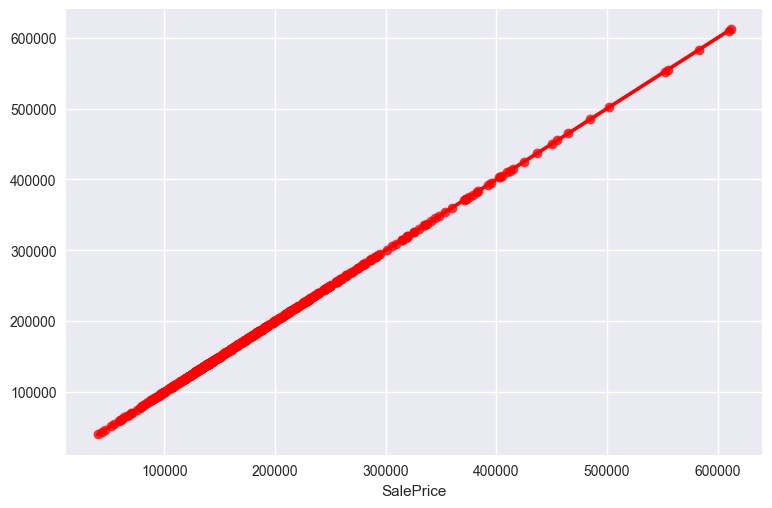

In [34]:
sns.regplot(x=y_test,y=pred_mlr,ci=None,color ='red')

## Build the LASSO Regresssion Model

In [35]:
X = data_imputed.drop('SalePrice', axis = 1)
y = data_imputed['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

## Tuning Lasso Hyperparameters
scikit-learn library also provides a built-in version of the algorithm that automatically finds good hyperparameters via the LassoCV class
The model is fit on the training dataset as per normal and the hyperparameters are tuned automatically during the training process
The fit model can then be used to make a prediction

In [37]:
def tuned_model(x, y):
  # Implementing the K fold Crossvalidation method
  cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42 )
  # define model
  model = LassoCV(alphas = arange(0, 10, 0.1),fit_intercept=True, normalize=True, max_iter=5000, cv = cv)
  # fit model
  model.fit(x, y)
  return model

In [38]:
optimized_model = tuned_model(scaled_X_train, y_train) # optimized_model_lasso

c:\Users\usman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\usman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362517929944.78516, tolerance: 1239018073.8847685
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\usman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\usman\AppData

In [39]:
optimized_model.alpha_

9.600000000000001

In [40]:
y_predicted = optimized_model.predict(scaled_X_test)
rmse = mean_squared_error(y_test, y_predicted)
mape = mean_absolute_percentage_error(y_test, y_predicted)
r2s = r2_score(y_test, y_predicted)
print(f"RMSE: {rmse}\nMAPE: {mape}\nRSquared: {r2s}")

RMSE: 743053868.8443898
MAPE: 0.08156468250114206
RSquared: 0.8946572540014993



Yes most of the features that were considered statistaiclly insignifcant in Lasso Regression were the same ones eliminated in backward elimination (MLR)

In [41]:
optimized_model.coef_

array([-5.98759063e+02,  2.71694882e+02,  4.54194870e+03,  1.11148730e+04,
        5.60506848e+03,  6.24564250e+03,  1.45084389e+03,  3.74889621e+03,
        6.97778484e+03,  5.58547947e+02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.56079106e+03,
        0.00000000e+00, -5.54172510e+02,  0.00000000e+00,  1.52072483e+02,
       -2.06573008e+03, -1.50300540e+03,  0.00000000e+00,  1.63846842e+03,
        7.26297855e+02,  1.90219365e+03,  3.36239408e+03,  1.43931114e+03,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.98971878e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -9.03477011e+02,
        1.41356966e+04,  1.45780642e+04,  2.54270660e+02,  1.67743963e+03,
       -6.56548260e+02, -6.06878829e+02, -0.00000000e+00,  8.74095784e+02,
        0.00000000e+00,  2.28445614e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [42]:
y = data_imputed['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.2, random_state = 42)

In [43]:
scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

In [44]:
# define model
lasso_model = tuned_model(scaled_X_train, y_train)

c:\Users\usman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\usman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\usman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\usman\AppData\Local\Progr

In [45]:
# printing alpha value for only important features
print(f"Best ALPHA value with only important features is: {lasso_model.alpha_}")

Best ALPHA value with only important features is: 0.1


In [46]:
pred_lasso = lasso_model.predict(scaled_X_test)
rmse = mean_squared_error(y_test, pred_lasso)
mape = mean_absolute_percentage_error(y_test, pred_lasso)
r2s = r2_score(y_test, pred_lasso)
print(f"RMSE: {rmse}\nMAPE: {mape}\nRSquared: {r2s}")

RMSE: 23.67456814924753
MAPE: 2.101908093057779e-05
RSquared: 0.9999999966436565


<AxesSubplot: xlabel='SalePrice'>

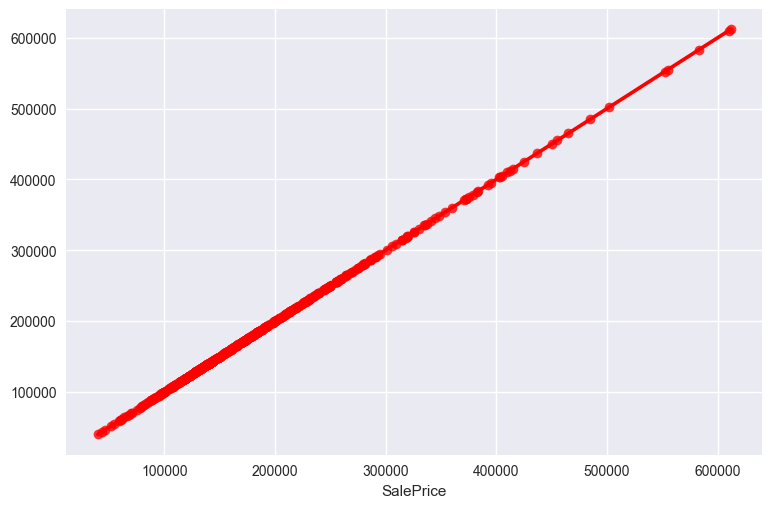

In [47]:
sns.regplot(x=y_test,y=pred_lasso,ci=None,color ='red')

## Build the Ridge Regresssion Model

In [83]:
# This function will find best value for alpha
def tuned_ridge_model(x, y):
  # Implementing the K fold Crossvalidation method
  cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42 )
  # define model
  model = RidgeCV(alphas = arange(0, 10, 0.1),fit_intercept=True, normalize=True, cv = cv)
  # fit model
  model.fit(x, y)
  return model

In [84]:
X = data_imputed.drop('SalePrice', axis = 1)
y = data_imputed['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [85]:
scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

In [88]:
ridge_model = tuned_ridge_model(scaled_X_train, y_train)
print(f"Best alpha value for ridge regression with all features: {ridge_model.alpha_}")

ValueError: alphas[0] == 0.0, must be > 0.0.

In [52]:
y_predicted = ridge_model.predict(X_test)
rmse = mean_squared_error(y_test, y_predicted)
mape = mean_absolute_percentage_error(y_test, y_predicted)
r2s = r2_score(y_test, y_predicted)
print(f"RMSE: {rmse}\nMAPE: {mape}\nRSquared: {r2s}")

NameError: name 'ridge_model' is not defined

In [83]:
ridge_model.coef_

array([-1.85449354e+03,  9.59200492e+02,  4.39602162e+03,  7.45154122e+03,
        4.23611886e+03,  2.80309376e+03,  1.74829379e+03,  4.04313309e+03,
        5.06171564e+03,  9.14047032e+02, -9.52401393e+02,  4.65002233e+03,
        4.20949675e+03,  3.73904143e+03,  6.23551542e+01,  6.42078150e+03,
        6.50606051e+02, -7.24569357e+02,  1.37130208e+03,  1.44386909e+03,
       -1.53287397e+03, -2.01871820e+03,  1.59367079e+03,  2.40010282e+03,
        1.07408106e+03,  2.75397837e+03,  3.38838891e+03,  1.89945442e+03,
        1.32842716e+02, -7.70270310e+01, -3.18269274e+01,  1.90397709e+03,
       -7.35689436e+02,  3.36292105e+02,  2.08528420e+02, -1.09714939e+03,
        6.71371139e+03,  6.44949479e+03,  9.95940164e+02,  1.82731002e+03,
       -4.58521775e+02, -7.31572723e+02, -5.14701042e+02,  1.85691295e+03,
        2.08598286e+02,  1.85233184e+03, -8.05432808e+02,  6.61281359e+01,
       -8.79220480e+02,  9.59048360e+02,  1.68787178e+02,  2.82948288e+02,
        9.14356770e+02, -

Ridge doesn't contribute much for feature extraction while Lasso does

In [59]:
y = data_imputed['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size = 0.2, random_state = 42)

In [60]:
scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

In [61]:
ridge_model=tuned_ridge_model(scaled_X_train, y_train)
print(f"Best alpha value: {ridge_model.alpha_}")

ValueError: alphas[0] == 0.0, must be > 0.0.

In [87]:
pred_ridge = ridge_model.predict(scaled_X_test)
rmse = mean_squared_error(y_test, pred_ridge)
mape = mean_absolute_percentage_error(y_test, pred_ridge)
r2s = r2_score(y_test, pred_ridge)
print(f"RMSE: {rmse}\nMAPE: {mape}\nRSquared: {r2s}")

RMSE: 0.08337207950328224
MAPE: 4.591547122339024e-08
RSquared: 0.9999999999881803


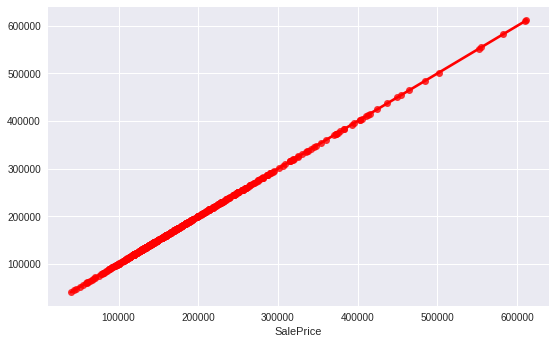

In [88]:
sns.regplot(x=y_test,y=pred_ridge,ci=None,color ='red')

## Build the Kernel Ridge Regresssion Model
 

In [62]:
X = data_imputed.drop('SalePrice', axis = 1)
y = data_imputed['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [63]:
scaled_X_train, scaled_X_test = scale_data(X_train, X_test)

In [64]:
alphas = arange(0, 30, 0.1)

In [65]:
import math

c:\Users\usman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


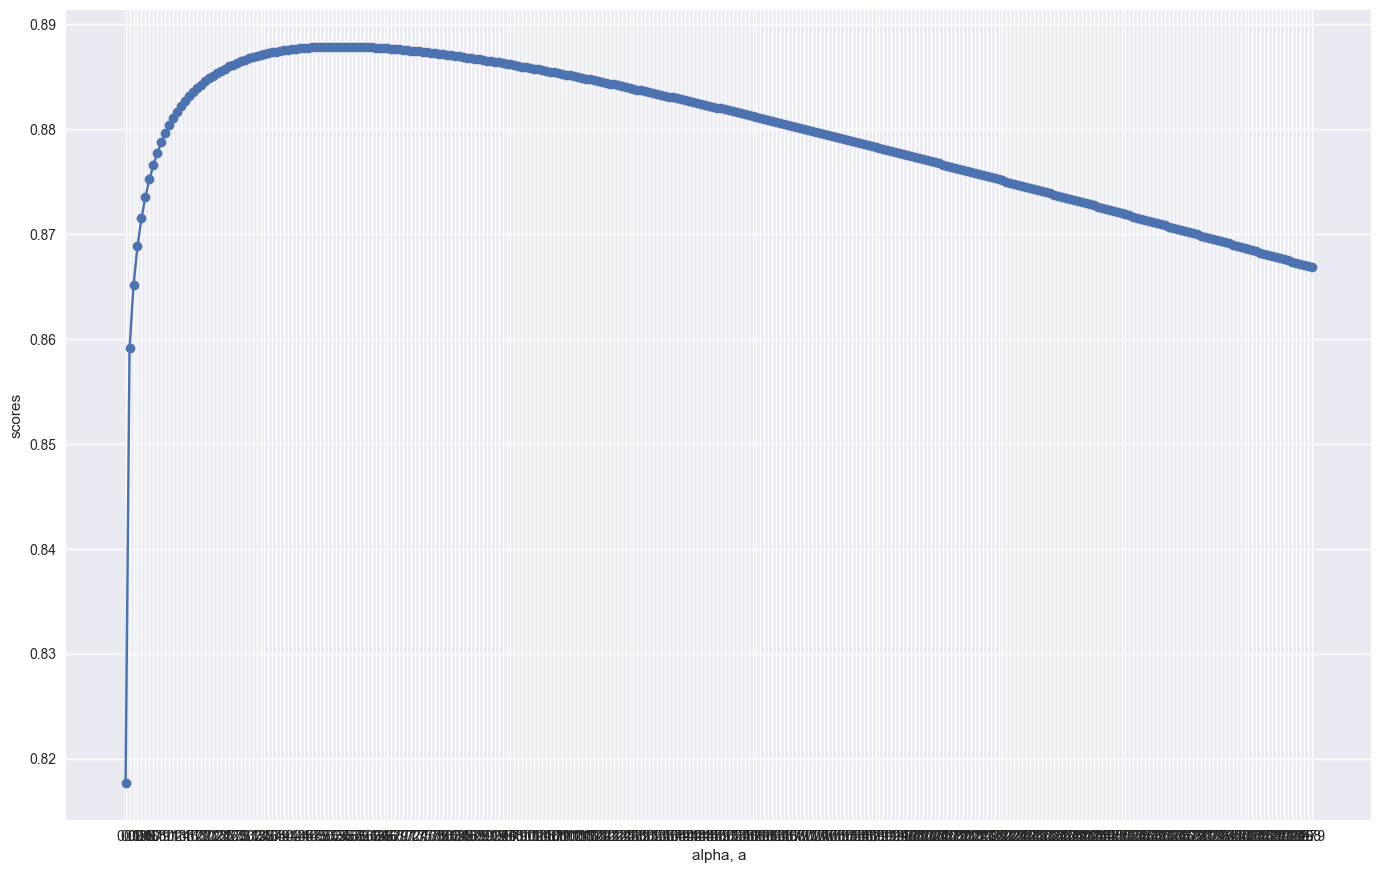

In [66]:
plt.figure(figsize=(15, 10))
alphas = arange(0, 30, 0.1)
scores = []
best_score = math.inf
best_alpha = 0.0001
for a in alphas:
    Kridge = KernelRidge(alpha = a, kernel = "polynomial", degree = 2)
    Kridge.fit(scaled_X_train, y_train)
    score = Kridge.score(scaled_X_test, y_test)
    if score <= best_score:
      best_score = score
      best_alpha = a
    scores.append(score)
    

plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()



In [67]:
Kridge = KernelRidge(alpha = best_alpha, kernel = "polynomial", degree = 2)
Kridge.fit(scaled_X_train, y_train)
pred_krr = Kridge.predict(scaled_X_test)
rmse = mean_squared_error(y_test, pred_ridge)
mape = mean_absolute_percentage_error(y_test, pred_ridge)
r2s = r2_score(y_test, pred_ridge)
print(f"RMSE: {rmse}\nMAPE: {mape}\nRSquared: {r2s}")

c:\Users\usman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:251: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


NameError: name 'pred_ridge' is not defined

## Model Comparison and Conclusion

For Multiple Linear Regression


[Text(0, 0.5, 'residuals'), Text(0.5, 0, 'fitted values')]

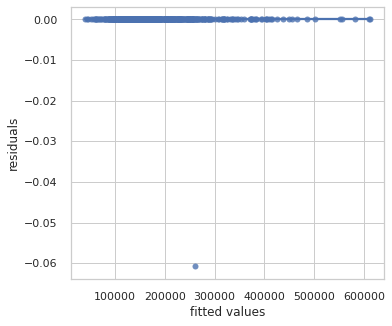

In [97]:
print("For Multiple Linear Regression")
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.regplot(x=pred_mlr,y=y_test-pred_mlr,ax=ax,lowess=True)
ax.set(ylabel='residuals',xlabel='fitted values')

Residual Plot for LAsso


[Text(0, 0.5, 'residuals'), Text(0.5, 0, 'fitted values')]

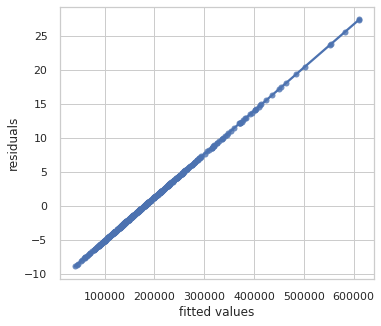

In [98]:
print("Residual Plot for LAsso")
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.regplot(x=pred_lasso,y=y_test-pred_lasso,ax=ax,lowess=True)
ax.set(ylabel='residuals',xlabel='fitted values')

Residual Plot for Ridge


[Text(0, 0.5, 'residuals'), Text(0.5, 0, 'fitted values')]

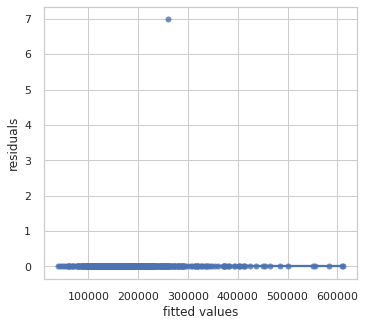

In [99]:
print("Residual Plot for Ridge")
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.regplot(x=pred_ridge,y=y_test-pred_ridge,ax=ax,lowess=True)
ax.set(ylabel='residuals',xlabel='fitted values')

Residual Plot for Kernel Ridge


[Text(0, 0.5, 'residuals'), Text(0.5, 0, 'fitted values')]

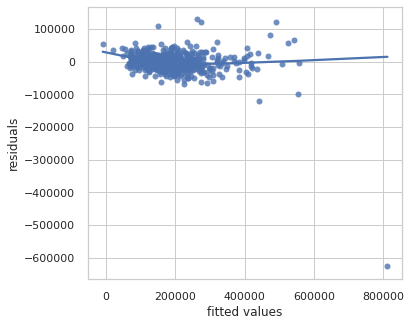

In [100]:
print("Residual Plot for Kernel Ridge")
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.regplot(x=pred_krr,y=y_test-pred_krr,ax=ax,lowess=True)
ax.set(ylabel='residuals',xlabel='fitted values')



From above models and error statistics, It can be seen that all modal accuracies are near to 99%, however ridge and kridge performs better because of less rmse values and i would like to suggest one of them for prediction of the sale price of houses.